In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
#import warnings
import warnings
# ignore warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
data = pd.read_csv("column_2C_weka.csv")
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


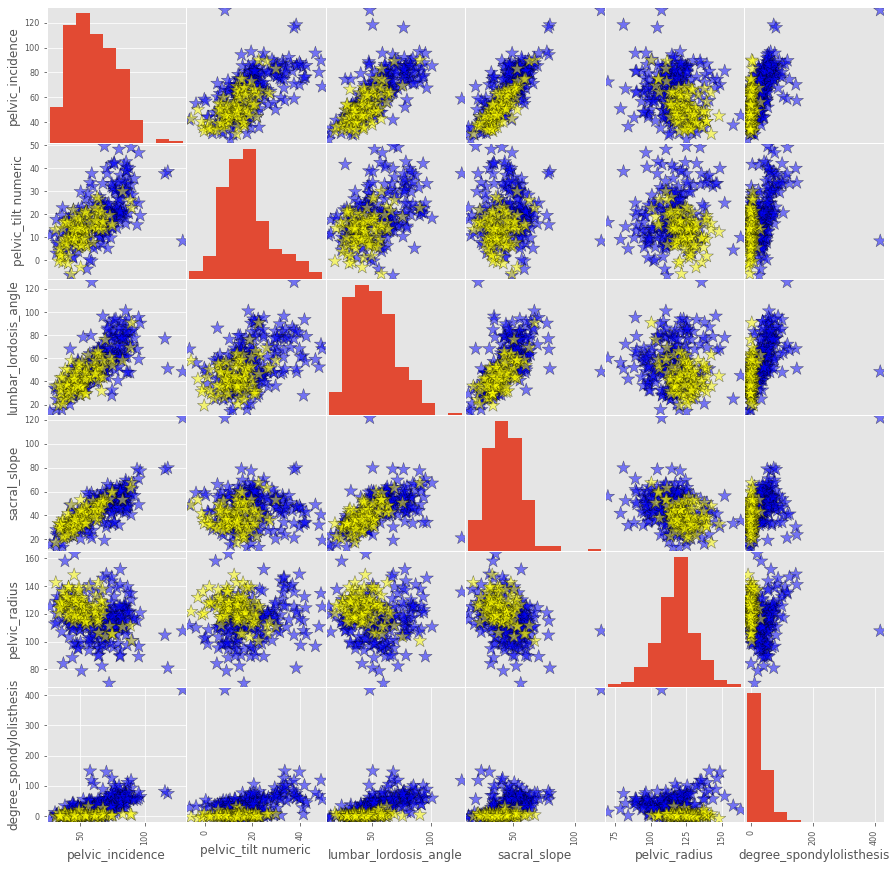

In [10]:
color_list = ['blue' if i == "Abnormal" else 'yellow' for i in data.loc[:,"class"]]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                          c = color_list,
                          figsize = [15,15],
                          diagonal = 'hist',
                          alpha=0.5,
                          s = 200,
                          marker = '*',
                          edgecolor= "black")

plt.show()

Abnormal    210
Normal      100
Name: class, dtype: int64

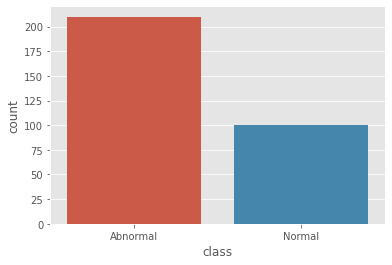

In [11]:
sns.countplot(x="class", data=data)
data.loc[:,"class"].value_counts()

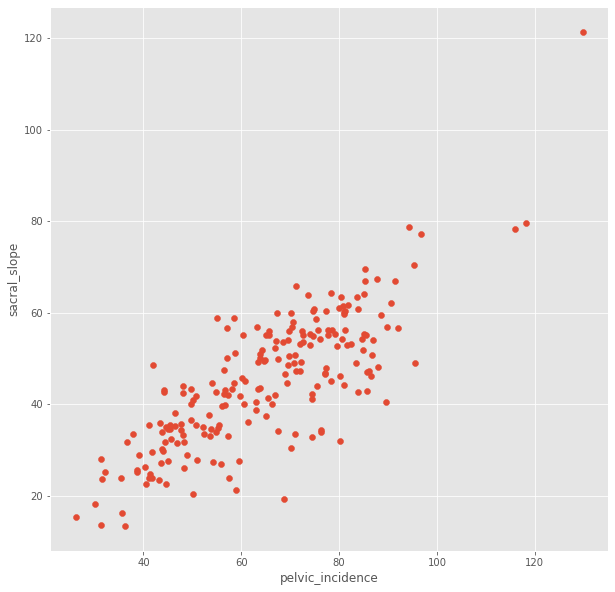

In [12]:
#create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable

data1 = data[data["class"] == "Abnormal"]
x = np.array(data1.loc[:,"pelvic_incidence"]).reshape(-1,1)
y =np.array(data1.loc[:,"sacral_slope"]).reshape(-1,1)
 # Scatter 
plt.figure(figsize = [10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score: 0.6458410481075871


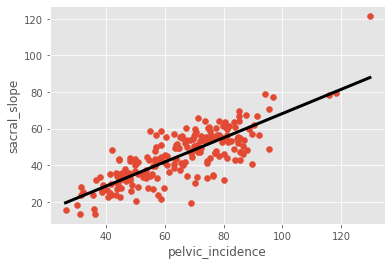

In [13]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#Predict Space
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
#Fit
reg.fit(x,y)
#Predict
predicted = reg.predict(predict_space)
#R^2
print('R^2 score:', reg.score(x,y))
#Plot regression line and scatter
plt.plot(predict_space, predicted,color = 'black', linewidth = 3)
plt.scatter(x=x, y=y)
plt.xlabel("pelvic_incidence")
plt.ylabel("sacral_slope")
plt.show()